# Entrenamiento YOLO

## Importaciones

In [1]:
import os
import os.path as osp
from ultralytics import YOLO # En este segmento desde ultralytics importamos el modelo preentrenado YOLO

## Previsualizacion

In [2]:
import os.path as osp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np

def show_img_matrix(image_list, show_axis=False):
    MAX_SIZE = 9  # La cuadrícula es de 3x3
    if len(image_list) != MAX_SIZE:
        print(f"Error: Se requieren exactamente {MAX_SIZE} imágenes para mostrar la cuadrícula.")
        return
    
    plt.figure(figsize=(10, 10))
    
    for i in range(MAX_SIZE):
        img_file = image_list[i]
        img_name = osp.basename(img_file)
        
        # Subplot 3x3
        ax = plt.subplot(3, 3, i + 1)
        
        if osp.exists(img_file):
            img = np.array(Image.open(img_file))  # Leer la imagen como array
            plt.imshow(img)
            plt.title(img_name[:20])  # Mostrar el nombre de la imagen, recortado a 20 caracteres
            plt.axis("on" if show_axis else "off")  # Mostrar o no los ejes
        else:
            print(f"Advertencia: {img_file} no se encontró.")
    
    plt.tight_layout()
    plt.show()


In [3]:
images_folder = "./datasets/images"
label_folder = "./datasets/labels"

train_img_folder = osp.join(images_folder, "train")
test_img_folder = osp.join(images_folder, "test")
valid_img_folder = osp.join(images_folder, "val")

train_lbl_folder = osp.join(label_folder, "train")
test_lbl_folder = osp.join(label_folder, "test")
valid_lbl_folder = osp.join(label_folder, "val")

In [4]:
img_list = [filename for filename in os.listdir(train_img_folder)]
img_count = len(img_list)
img_list_test = [filename for filename in os.listdir(test_img_folder)]
img_count_test = len(img_list_test)
img_list_val = [filename for filename in os.listdir(valid_img_folder)]
img_count_val = len(img_list_val)
print(f"El número total de imágenes en train es: {img_count}")
print(f"El número total de imágenes en test es: {img_count_test}")
print(f"El número total de imágenes en validation es: {img_count_val}")

El número total de imágenes en train es: 155
El número total de imágenes en test es: 34
El número total de imágenes en validation es: 33


In [5]:
img_fc_list = [osp.join(train_img_folder, filename) for filename in img_list]

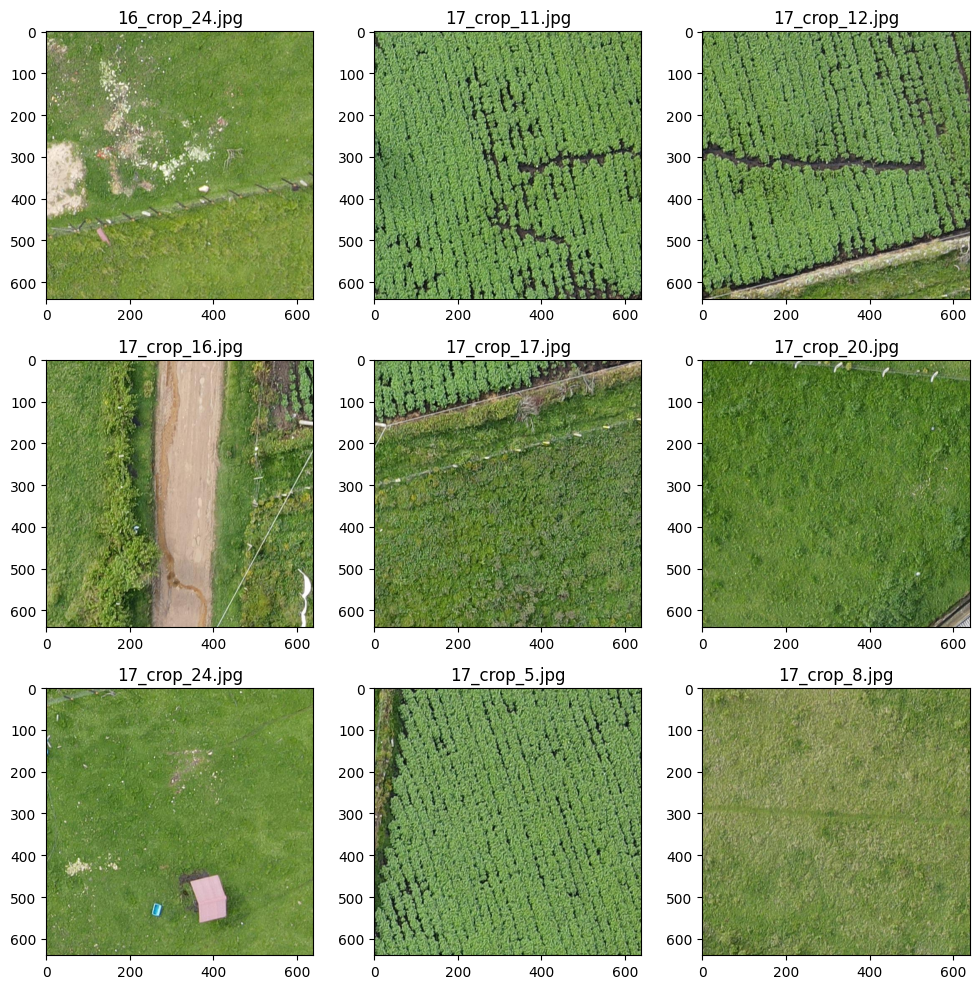

In [6]:
show_img_matrix(img_fc_list[0:9], show_axis=True)

## Entrenamiento de YOLO

In [7]:
YOLO_VERSION = 'yolov8'
YOLO_DIR = f'{YOLO_VERSION}'

## Escritura de YAML

In [8]:
# Definir las variables necesarias
ROOT_DIR = "datasets"  
DATASET_NAME = "papas"  
class_names = ["papa"] 

# Crear el contenido del archivo YAML
yaml_content = f"""\
path: {ROOT_DIR}   
train: images/train  
val: images/val 
test: images/test

# Clases
nc: {len(class_names)}

names: {class_names}
"""

# Ruta para guardar el archivo YAML
YAML_PATH = osp.join('yolo8n.yaml')

# Eliminar el archivo YAML si ya existe
if osp.exists(YAML_PATH):
    os.remove(YAML_PATH)

# Guardar el archivo YAML
with open(YAML_PATH, 'w') as yaml_file:
    yaml_file.write(yaml_content)

print(f"Archivo YAML guardado en: {YAML_PATH}")


Archivo YAML guardado en: yolo8n.yaml


In [9]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 18.7MB/s]

c:\Users\juana\OneDrive\Documentos\Maestria\Maestria_4_2024_20\Deep_Learning\Proyecto\blank-app-DL\venv\Lib\site-packages\ultralytics\nn\tasks.py:341: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please o

In [10]:
model = YOLO('yolo8n.yaml')

KeyError: 'head'

In [11]:
model.train(data='yolo8n.yaml', epochs=100, imgsz=640)  # Ajusta según sea necesario

yolo\engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=yolo8n.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=True, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.001, warmup_epochs=3.0, warmup_momentum=

URLError: <urlopen error [WinError 10054] An existing connection was forcibly closed by the remote host>